In [1178]:
from math import *
import numpy as np
from numpy.linalg import eig
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [1179]:
mu, k = 3, 45

In [1180]:
kp, kd = 50000,50000

In [1181]:
x = np.array([0, 0.1, 10])
y = np.array([0, 1, 1])

In [1182]:
def StepFunction(t):
    return 0 if t < 0.1 else 1

In [1183]:
x0 = np.zeros((2))
time = np.linspace(0, 10, 100)

In [1184]:
#using control
def controlled_step_osc(x,t):
    x_desired = stepFunction(t)
    x_dot_desired = 0
    
    error, e = x_desired - x[1]
    error_dot = x_dot_desired - x[0]
    
    u = kp* error + kd * error_dot
    return np.array([(u - mu*x[0] - k*x[1]), x[0]])


In [1185]:
solution_w_c_step = {"controlled damped oscillator with step": odeint(controlled_step_osc, x0, time)}

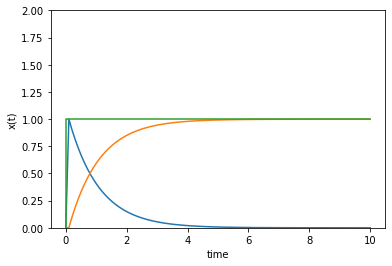

In [1186]:
#plot with control
plt.subplot(1, 1, 1)
plt.ylim(0, 2), 
plt.plot(time, solution_w_c_step["controlled damped oscillator with step"])
plt.step(x,y)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()